# Analytical solution for solitons in 1D advected GP

In one dimension, we have the GP equation as 

$ \partial_t \psi = -\frac{i c}{\sqrt{2}\xi} \left( -\xi^2 \partial_{xx}^2 + \frac{|\psi|^2}{n_0} - 1 \right) \psi $

where $\psi = \psi(x,t)$. if we consider now solutions of the type $\psi(x,t) = \psi(x-Ut)$ and now call $\eta = x-Ut$ with $\partial_x = \partial_\eta$ and $\partial_t = -U \partial_\eta$, we have then

$ \partial_t \psi - U\partial_\eta \psi = -\frac{i c}{\sqrt{2}\xi} \left( -\xi^2 \partial_{\eta\eta}^2 + \frac{|\psi|^2}{n_0} - 1 \right) \psi $

Let's use now the Madelung transformation $\psi(x) = R(x) e^{i \phi(x)}$ where $|\psi|^2 = R^2$ and the velocity field $v = \hbar/m \partial_x \phi$. Note that we now call $x$ to $\eta$. If we consider stationary solutions of this system we have that the real and imaginary part lead to equation for the phase and the density as 

$\frac{U}{c}\partial_x R = \frac{\xi}{\sqrt{2}} (2\partial_x R \partial_x \phi + R \partial_{xx}^2 \phi)$

$-\frac{U}{c}R \partial_x \phi = \frac{\xi}{\sqrt{2}} \left[ \partial_{xx}^2 R - R(\partial_x \phi)^2\right] - \frac{1}{\sqrt{2}\xi} \left[\frac{R^3}{n_0} - R \right]$

We first solve analytically the first equation to find an expression for the gradient of the phase $f = \partial_x \phi$ ...

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sympy import I
from sympy.plotting import plot

In [2]:
x = sp.Symbol('x', real=True)
vel = sp.Symbol('U', real=True)
c = sp.Symbol('c', real=True)
xi = sp.Symbol('xi', real=True)
n0 = sp.Symbol('n0', real=True)
R = sp.Function('R', real=True)
phi = sp.Function('phi', real=True)
f = sp.Function('f', real=True)

phase_equation = sp.Eq(vel/c*sp.diff(R(x), x), xi/sp.sqrt(2)* (2*sp.diff(R(x),x)*f(x) + R(x)*sp.diff(f(x),x)), ics={f(sp.oo):0, R(sp.oo):sp.sqrt(n0)})

f_sol = sp.dsolve(phase_equation, f(x))

display(f_sol)

Eq(f(x), (sqrt(2)*U + exp(C1*c*xi)/R(x)**2)/(2*c*xi))

In [3]:
# I don't know how to obtain the good value for C1, but at infinity R(inf)->sqrt(n0) and f(inf)->0
# which leads to C1 = 1/(c*xi)*log(-sqrt(2)*U*n0)

f_sol = vel/sp.sqrt(2)/(c*xi) * (1 - n0/R(x)**2)
display(f_sol)

sqrt(2)*U*(-n0/R(x)**2 + 1)/(2*c*xi)

We have now an expression for $\partial_x \phi$, so we can now replace it into the density equation to obtain

In [4]:
density_equation = sp.Eq(-vel/c*R(x)*sp.diff(phi(x), x), xi/sp.sqrt(2) * (sp.diff(sp.diff(R(x),x)) - 
                            R(x)*sp.diff(phi(x),x)**2) - 1/(sp.sqrt(2)*xi)*(R(x)**3/n0 - R(x)) )
display(sp.Eq(sp.diff(phi(x),x), f_sol))
display(density_equation)

# We replace the solution for the gradient of the phase in the density equation
density_equation_f = density_equation.subs(sp.diff(phi(x),x), f_sol)
display(density_equation_f.simplify())

Eq(Derivative(phi(x), x), sqrt(2)*U*(-n0/R(x)**2 + 1)/(2*c*xi))

Eq(-U*R(x)*Derivative(phi(x), x)/c, sqrt(2)*xi*(-R(x)*Derivative(phi(x), x)**2 + Derivative(R(x), (x, 2)))/2 - sqrt(2)*(-R(x) + R(x)**3/n0)/(2*xi))

Eq(sqrt(2)*U**2*(n0 - R(x)**2)/(2*c**2*xi*R(x)), sqrt(2)*(2*c**2*(n0 - R(x)**2)*R(x)**4 - n0*(U**2*(n0 - R(x)**2)**2 - 2*c**2*xi**2*R(x)**3*Derivative(R(x), (x, 2))))/(4*c**2*n0*xi*R(x)**3))

In [5]:
# Solution for U=0
density_equation_f_u0 = density_equation_f.subs(vel,0).simplify()
display(density_equation_f_u0)

# This may take long, or even for ever (not able to solve)
density_u0_sol = sp.dsolve(density_equation_f_u0, R(x), ics={R(sp.oo):sp.sqrt(n0)})

Eq(sqrt(2)*(n0*xi**2*Derivative(R(x), (x, 2)) + (n0 - R(x)**2)*R(x))/(2*n0*xi), 0)

KeyboardInterrupt: 

In [13]:
# This is the solution I obtained by other methods.

R = sp.sqrt(n0)*sp.sqrt( (vel/c)**2 + (1-(vel/c)**2) * sp.tanh((1-(vel/c)**2)*x/sp.sqrt(2)/xi)**2 )

display(R)

sqrt(n0)*sqrt(U**2/c**2 + (-U**2/c**2 + 1)*tanh(sqrt(2)*x*(-U**2/c**2 + 1)/(2*xi))**2)

In [20]:
# Now we can obtain the phase by replacing this in the previos expression and integrating

phase = sp.integrate(vel/(sp.sqrt(2)*xi*c) * (1 - n0/R**2), (x, 0, sp.oo))

In [21]:
display(phase)

sqrt(2)*U*(-U + c)*(U + c)*Integral((tanh(-sqrt(2)*U**2*x/(2*c**2*xi) + sqrt(2)*x/(2*xi)) - 1)*(tanh(-sqrt(2)*U**2*x/(2*c**2*xi) + sqrt(2)*x/(2*xi)) + 1)/(-U**2*tanh(-sqrt(2)*U**2*x/(2*c**2*xi) + sqrt(2)*x/(2*xi))**2 + U**2 + c**2*tanh(-sqrt(2)*U**2*x/(2*c**2*xi) + sqrt(2)*x/(2*xi))**2), (x, 0, oo))/(2*c*xi)

In [71]:
display(sp.re(gp.lhs - gp.rhs).simplify())

(U*xi*(R(x)*im(exp(I*phi(x))*Derivative(phi(x), x)) - re(exp(I*phi(x))*Derivative(R(x), x))) + sqrt(2)*c*(xi**2*(R(x)*re(exp(I*phi(x))*Derivative(phi(x), (x, 2))) - R(x)*im(exp(I*phi(x))*Derivative(phi(x), x)**2) + 2*re(exp(I*phi(x))*Derivative(R(x), x)*Derivative(phi(x), x)) + im(exp(I*phi(x))*Derivative(R(x), (x, 2)))) + R(x)*sin(phi(x)))/2)/xi

In [72]:
display(sp.im(gp.lhs - gp.rhs).simplify())

(-U*n0*xi*(R(x)*re(exp(I*phi(x))*Derivative(phi(x), x)) + im(exp(I*phi(x))*Derivative(R(x), x))) + sqrt(2)*c*(n0*(xi**2*(R(x)*re(exp(I*phi(x))*Derivative(phi(x), x)**2) + R(x)*im(exp(I*phi(x))*Derivative(phi(x), (x, 2))) - re(exp(I*phi(x))*Derivative(R(x), (x, 2))) + 2*im(exp(I*phi(x))*Derivative(R(x), x)*Derivative(phi(x), x))) - R(x)*cos(phi(x))) + R(x)**2)/2)/(n0*xi)

In [188]:
# phase = sp.atan( sp.sqrt(2*(vel/c)**2 - (vel/c)**4) / (sp.exp(sp.sqrt(2 - (vel/c)**2)*x/xi) + (vel/c)**2 - 1))
phase = sp.atan( sp.sqrt(4*(vel/c)**2 - 4*(vel/c)**4) / (sp.exp(sp.sqrt(2 - 2*(vel/c)**2)*x/xi) + (vel/c)**2*2 - 1))

In [189]:
# R2 = ( (vel/2) / (vel/2 - sp.diff(phase,x))).simplify()
R2 = ( n0 / (1 - sp.sqrt(2)*c*xi/vel*sp.diff(phase,x))).simplify()
R_sol = sp.sqrt(n0)*sp.sqrt((vel/c)**2 + (1 - (vel/c)**2 ) * sp.tanh(sp.sqrt(0.5 - (vel/c)**2/2) * x/xi)**2 )
display(R2.subs({vel:0.5,xi:1,c:1,n0:1}))
display(R_sol.subs({vel:0.5,xi:1,c:1,n0:1}))

0.5*(-(exp(0.866025403784439*sqrt(2)*x) - 0.5)**2 - 0.75)/(-0.5*(exp(0.866025403784439*sqrt(2)*x) - 0.5)**2 - 1.5*exp(0.866025403784439*sqrt(2)*x) - 0.375)

0.866025403784439*sqrt(tanh(0.433012701892219*sqrt(2)*x)**2 + 0.333333333333333)

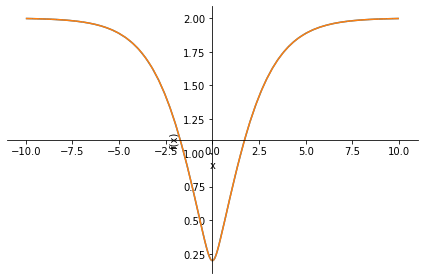

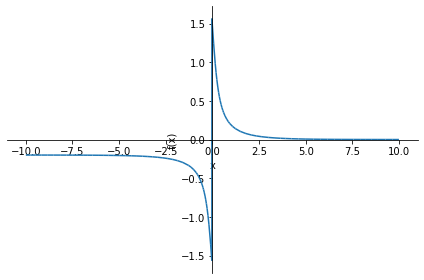

In [192]:
# xlin = np.linspace(0, np.pi, 100)
U = 0.1
nxi = 2
nc = 1
nn0 = 4
p1 = plot(R_sol.subs({vel:U,xi:nxi,c:nc,n0:nn0}), line_color='C0', show=False)
p2 = plot(sp.sqrt(R2.subs({vel:U,xi:nxi,c:nc,n0:nn0})), line_color='C1', show=False)
p1.append(p2[0])
p3 = plot(phase.subs({vel:U,xi:nxi,c:nc,n0:nn0}), line_color='C0', show=False)
p1.show()
p3.show()